Dataset analysis of mental state (sober or high) vs performance in fortntie
https://www.kaggle.com/datasets/johnharshith/fortnite-statistics-corresponding-to-mental-state

Both me and general data science are not the best of friends, if its not flash and wizz bang-y my brain plays lets do anything else but that, but i tried my best and wacked some data in graph and chose a stupid  dataset , it was on about page 500 of kaggle, so i dug deep for it

The main question this dataset makes me ask is, should I be taking drugs when i play video games?, the actual data itself this dataset was built from was removed from dataworld for violating terms and conditions but the kaggle set still exists, so unfortunatly i dont have an answer for what sort of drugs we should be taking, but based on my knowledge of gaming culture its probably weed

please dont reference this dataset to your doctor or anyone in rehab, i chose this dataset because it is different from what most of us are doing based on my evesdropping into other tables conversations, so it will be memoriable because i exist to live rent free in everyones heads for a few weeks, not because i want you to be hooked on drugs for the sake of becoming a video game legend



In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fortnite_df = pd.read_csv('Datasets/FortniteStatistics.csv', sep=',')

fortnite_df

,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4/15,6:00 PM,22,high,3,3,1,34%,78,5,361.31,0,0,329,362,990
76,4/15,10:00 PM,15,sober,3,0,1,36%,83,13,336.46,175,10,223,1014,2434
77,4/15,11:00 PM,34,sober,2,2,1,53%,61,3,314.10,60,0,106,658,415
78,4/15,11:00 PM,15,sober,1,1,1,45%,30,0,1170.00,99,80,151,286,553


In [2]:
fortnite_df['Date And Time'] = pd.to_datetime(fortnite_df['Date'] + ' ' + fortnite_df['Time of Day'], format='%m/%d %I:%M %p')
fortnite_df['Date And Time'] = fortnite_df['Date And Time'].dt.strftime('%d-%m %I:%M %p')
fortnite_df.rename(columns={'Time of Day': 'Time'}, inplace=True)
fortnite = fortnite_df.drop('Date', axis=1) 

the above code converts the date/time stucres of the dattime part of the dataset into something that can be used

In [3]:
fortnite.shape
# 80 rows, 16 columns

(80, 16)

In [4]:
fortnite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  80 non-null     object 
 1   Placed                80 non-null     int64  
 2   Mental State          80 non-null     object 
 3   Eliminations          80 non-null     int64  
 4   Assists               80 non-null     int64  
 5   Revives               80 non-null     int64  
 6   Accuracy              80 non-null     object 
 7   Hits                  80 non-null     int64  
 8   Head Shots            80 non-null     int64  
 9   Distance Traveled     80 non-null     float64
 10  Materials Gathered    80 non-null     int64  
 11  Materials Used        80 non-null     int64  
 12  Damage Taken          80 non-null     int64  
 13  Damage to Players     80 non-null     int64  
 14  Damage to Structures  80 non-null     int64  
 15  Date And Time         80 

In [5]:
indexGraph = px.histogram(fortnite, y=fortnite_df.index, x='Date And Time', title='Display of Dataset', histfunc='count', )
indexGraph.show()

This is a basic overview of the dataset in graph form, the histogram displays the amount of entries accross the 5 days of data at each relvent time plot, you can see that the most amount of entries happened on the 14th of April at 1pm, whereas there are three entires that only contain one entry, at 1pm on the 11th of april, 3pm on the 11th of april and 10pm on the 15th of april which, based on my own experiences sounds about right for this sort of study


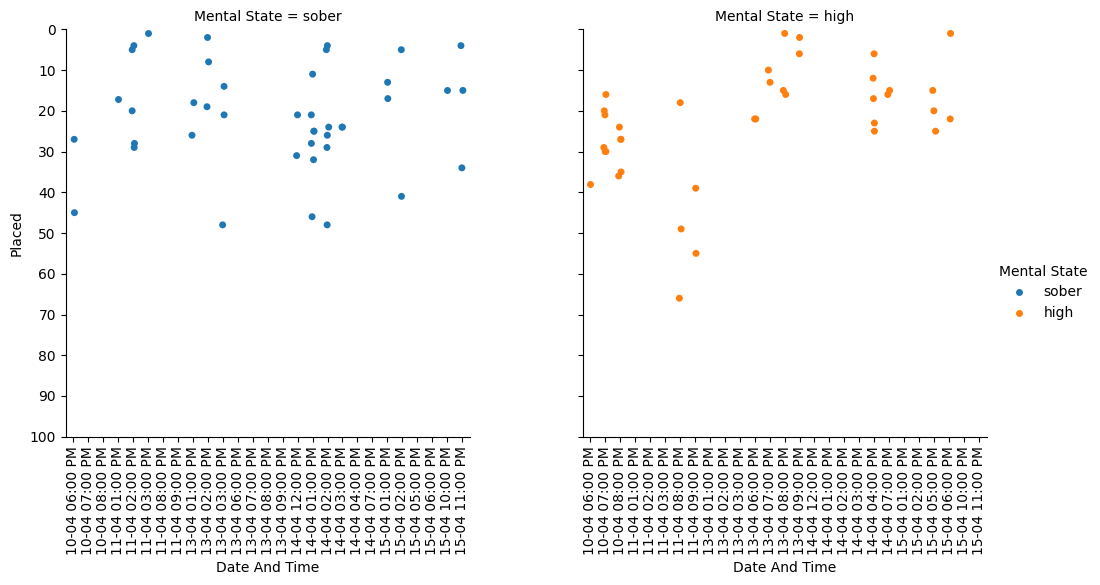

In [6]:
compareGraph = sns.catplot(x="Date And Time", col="Mental State", y="Placed", hue="Mental State", data=fortnite)
compareGraph.set(ylim=(0, 100))
compareGraph.set_xticklabels(rotation=90)
compareGraph.set(yticks=np.arange(0, 101, 10))
plt.gca().invert_yaxis()

These graphs seperate the two 'Mental State' Columns and plot the games played throughout the timeframe the dataset was taken ( 5 days), it shows the position player came at the end of thier game, for context, this game is out of 100 players alltogether. and the y axis has been inverted, as for the sake of this data, the closer to 0 you are is better (note the closest to zero you can be is 1,)


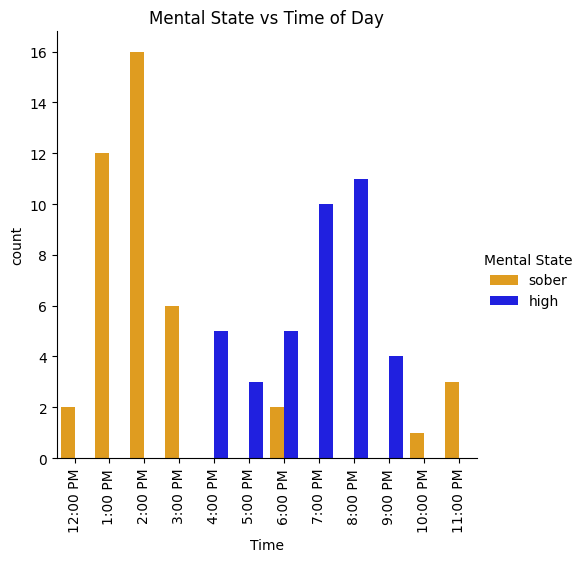

In [7]:
fortnite['Time'] = pd.Categorical(fortnite['Time'], categories=[
    '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM'], ordered=True)

timeMental = sns.catplot(x="Time", hue="Mental State", kind="count", data=fortnite, palette={'sober': 'orange', 'high': 'blue'})
timeMental.set_xticklabels(rotation=90)
plt.title('Mental State vs Time of Day')
plt.show()


this graph displays the times of day players who were involved in the data collection of this dataset. there is a very obvious timeframe of where high and sober players entered and tookpart in the game throughtout the afternoon/evening. You can also see where the  players under the influence dropped off and had to go to bed, 

In [8]:
eliminationsGraph = px.histogram(fortnite, y='Eliminations', color='Mental State', title='Mental State vs Eliminations', 
                                 barmode='group', nbins=10, color_discrete_map={'sober': 'orange', 'high': 'blue'})
eliminationsGraph.update_traces(marker_line_width=2, marker_line_color='black')
eliminationsGraph.show()


In [9]:
accuracyGraph = px.histogram(fortnite, y='Accuracy', color='Mental State', title='Mental State vs Accuracy', 
                             nbins=40, color_discrete_map={'sober': 'orange', 'high': 'blue'})
accuracyGraph.update_traces(marker_line_width=1, marker_line_color='black')
accuracyGraph.update_layout(yaxis_title='Accuracy (%)', yaxis=dict(tickmode='linear', dtick=5))
accuracyGraph.show()


This graph shows two different statistics and is sorted by mental state, as all the graphs im using are

there are two main factors. Accuracy % is how accurate the player is, this is usually calculated by totalling up the number of shots a player takes, and how many of them actually made a hit on another player and returns a %

there is a very obvious data difference comparing the two player states, which we can mostly cotton down to, players who play under the influence 


In [10]:
fortnite['Accuracy'] = fortnite['Accuracy'].astype(str)
fortnite['Accuracy'] = fortnite['Accuracy'].str.rstrip('%').astype('float')

fortnite.sort_values(by='Accuracy', inplace=True)

accuracyHeadshots = px.bar(
    fortnite, 
    x='Accuracy', 
    y='Head Shots', 
    color='Mental State', 
    title='Mental State Accuracy vs Head Shots', 
    barmode='group', 
    labels={'Accuracy': 'Accuracy %'}, 
    width=1000, 
    height=600,
    color_discrete_map={'sober': 'orange', 'high': 'blue'}
)
accuracyHeadshots.update_traces(marker_line_width=2, marker_line_color='black', width=1.5)
accuracyHeadshots.show()


In [11]:
top_10 = fortnite.nsmallest(10, 'Placed')
top_10

,Time,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures,Date And Time
74,6:00 PM,1,high,4,5,0,16.0,35,3,4460.0,941,350,182,997,5787,15-04 06:00 PM
38,8:00 PM,1,high,6,3,1,17.0,46,7,3830.0,1907,530,193,1308,18026,13-04 08:00 PM
20,3:00 PM,1,sober,7,0,0,25.0,63,9,3320.0,541,530,180,1399,17151,11-04 03:00 PM
30,2:00 PM,2,sober,8,0,1,17.0,34,7,3790.0,3002,1740,321,1166,10594,13-04 02:00 PM
41,9:00 PM,2,high,6,2,0,27.0,54,5,4050.0,2553,680,400,1383,4945,13-04 09:00 PM
53,2:00 PM,4,sober,5,3,1,16.0,38,4,3220.0,2215,410,158,1081,8810,14-04 02:00 PM
15,2:00 PM,4,sober,5,4,4,20.0,35,3,3230.0,715,420,200,894,9494,11-04 02:00 PM
79,11:00 PM,4,sober,5,2,2,42.0,52,0,3550.0,850,450,436,724,1377,15-04 11:00 PM
69,2:00 PM,5,sober,6,3,0,11.0,29,3,3350.0,421,230,366,764,11077,15-04 02:00 PM
16,2:00 PM,5,sober,3,6,1,17.0,32,11,2780.0,384,370,264,787,3589,11-04 02:00 PM


In [12]:
top10 = px.histogram(
    top_10,
    y='Placed',
    color='Mental State',
    title='Top 10 Players Mental State',
    barmode='group',
    opacity=0.75,
    color_discrete_map={'sober': 'orange', 'high': 'blue'},
    nbins=5,
    histfunc='count'
)
top10.update_traces(marker_line_width=2, marker_line_color='black')
top10.update_layout(
    yaxis=dict(range=[0, 10]),
    xaxis=dict(title='count')
)
top10.show()

This graph shows the positioning of the players in the top 10 of the dataset, the dataset was sorted by palcement, low to high and trimmed down to the first 10 entries,  More people who played sober entered the leaderboard, with only three people playing under the influence getting into the top 5. You can see form the blue bar, that out of the three people who came first, two of them were under the influence, 

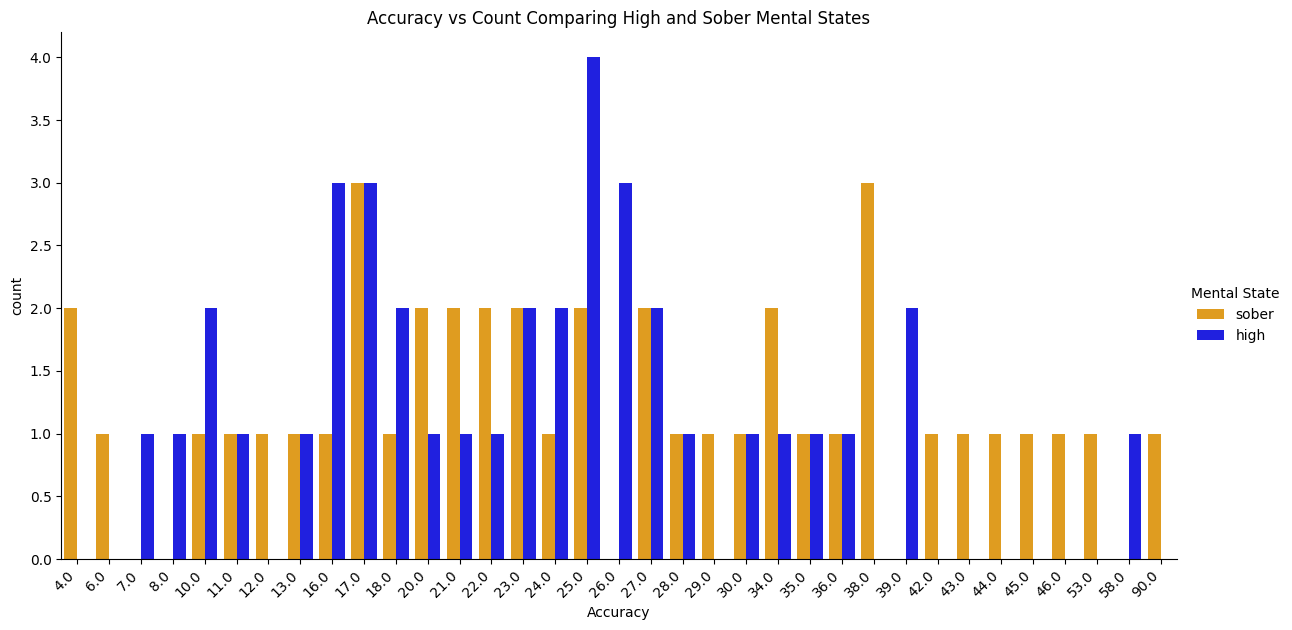

In [13]:
accuracy = sns.catplot(
    x='Accuracy', 
    hue='Mental State', 
    kind='count', 
    data=fortnite, 
    palette={'sober': 'orange', 'high': 'blue'},
    height=6, 
    aspect=2
)
accuracy.set_xticklabels(rotation=45, ha='right')
plt.title('Accuracy vs Count Comparing High and Sober Mental States')
plt.show()

I decided i didnt have the functioning brain power to play with data recersion and pattern pridiction to expand my dataset, i had a bunch of stuff to play with and had made some pretty blue & orange graphs to prov that maybe drugs are not the best idea if you want to be a pro gamer, but unfortuantly there was no data for how much fun the players had either high or sober

things i wanted to do but got distracted with other work
- push all of this into an active python script with an interactive menu to open and close 
- input the unfinished script i was writing that allows you to select axis and automatically plot a histogram (or just return no)

,I has also started writing a Twitch chat bot that can pull random music from spotify in Python, that one of my online contacts asked me todo, and it wasnt data science to my brain went wee, lets do that, and decided to start restoring an old Ipod, so now they are waiting for that aswell...

its not my place to tell you to or not to do drugs while gaming, i guess it depends how much you care about your scores, or if you just want to have fun


